### ANALYSIS OF CORONARY HEART DISEASE : INSIGHTS FROM THE FRAMINGHAM HEART STUDY DATASET

### Data Source : https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset/data

#### **Goals/Objectives**

- **Identification of Risk Factors** - This analysis will identify the most significant risk factors for coronary heart disease and as a result predict the probability of coronary heart disease when these factors are present/absent in a persons life
- **Missing Data Analysis** - This analysis will also analyze the pattern of missing data and it's impact on the study's results


Standard imports


In [1]:
# The Libraries needed for perfoming analysis

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import missingno as msno

In [2]:
# The relative path to where dataset is located

path = '../Data/framingham.csv'

### Data Preprocessing


In [3]:
# Loading data and displaying the first 10 records

df = pd.read_csv(path)
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


Getting shape of dataframe


In [4]:
df.shape

(4240, 16)

Getting a concise summary of the DataFrame.


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
# Getting basic statistics of the dataset
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
# Getting count of null values of each column
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Using msno.matrix(df) to get a simple visualization of nullity by column:


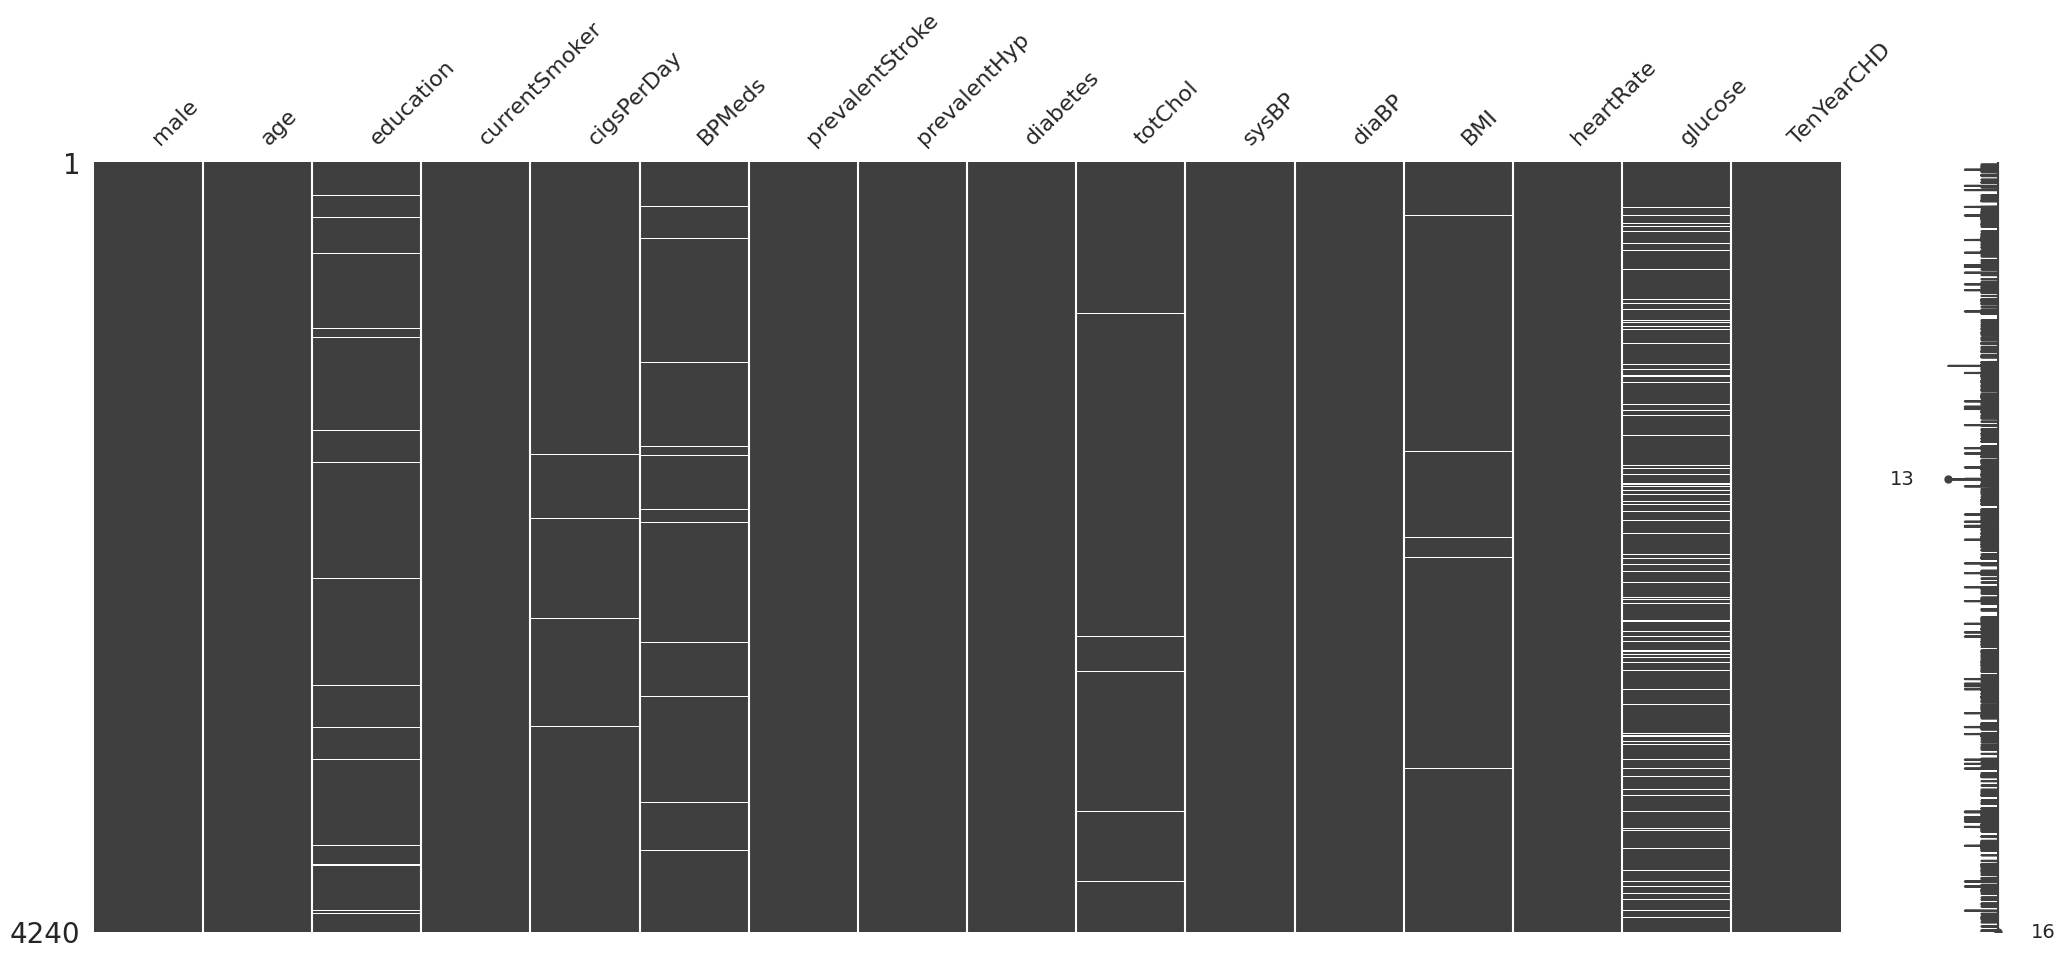

In [8]:
# Visualize missing values
msno.matrix(df)
plt.show()

Getting the nullity in each column by percentage


In [9]:
data = pd.DataFrame((df.isna().mean() * 100).round(2), columns=['count_%'])
data

,count_%
male,0.00
age,0.00
education,2.48
currentSmoker,0.00
cigsPerDay,0.68
BPMeds,1.25
prevalentStroke,0.00
prevalentHyp,0.00
diabetes,0.00
totChol,1.18


#### We can see that the columns with missing values are education, cigsPerDay, BPMeds, totChol, BMI, heartRate and glucose.<br>The columns will be cleaned differently


First lets look to see if they is a correlation between currentSmoker column and cigsPerDay


In [10]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


In [11]:
df.loc[(df['currentSmoker']) & (df['cigsPerDay'].isna())]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
131,1,43,4.0,1,NaN,0.0,0,0,0,222.0,109.5,69.0,25.50,75.0,NaN,0
139,1,49,4.0,1,NaN,0.0,0,0,0,256.0,127.5,81.5,28.21,93.0,85.0,1
1046,0,49,1.0,1,NaN,0.0,0,0,0,280.0,120.0,80.0,22.33,90.0,75.0,0
1292,1,42,3.0,1,NaN,0.0,0,0,0,225.0,122.5,80.0,25.54,90.0,90.0,0
1347,0,58,4.0,1,NaN,0.0,0,1,0,270.0,195.0,117.5,23.35,75.0,NaN,0
1451,1,54,1.0,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1497,1,55,1.0,1,NaN,0.0,0,0,0,214.0,132.5,85.5,29.25,70.0,103.0,0
1610,0,61,1.0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
1625,0,49,2.0,1,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0
1870,0,47,2.0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0


We can see that all null values found in cigsPerDay columns are located where currentSmoker is 1.<br>
This will helpful in knowing what method to use when cleaning data in cigsPerDay column


In [12]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Cleaning Data


### Method 1 : Filling missing values with zero

The null values in the education values might indicate that the person does not have any education background<br>
Thus we can simply fill all null values with zero


In [13]:
df['education'] = df['education'].fillna(0)

### Method 2 : Dropping records in columns

For columns whose percantage of missing values is less than 2% and have low correlations with other columns, we can simply drop the records since the impact on the datasey size will be small


In [14]:
columns_to_drop = ['BPMeds', 'totChol', 'BMI', 'heartRate']

In [15]:
len(df[columns_to_drop].dropna()) / len(df)

0.9714622641509434

We can confirm that less than 3% of the sample size will be lost. This is acceptable


In [16]:
df.dropna(subset=columns_to_drop, inplace=True)

### Method 3 : Imputing missing values with mean

For the remaining columns, we will fill the missing values with the means of the respective columns


In [17]:
# Getting mean value of cigarettes per day
mean_of_cigsPerDay = df.loc[(
    df['cigsPerDay'] > 0)]['cigsPerDay'].mean().round()
mean_of_cigsPerDay

18.0

In [18]:
# Filling the null values with the mean from the cell above
df['cigsPerDay'] = df['cigsPerDay'].fillna(mean_of_cigsPerDay)

<Axes: >

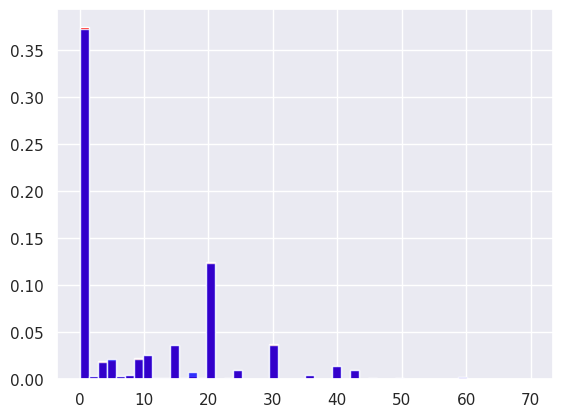

In [19]:
# PLotting the original data and the transformed data...with the red crowns representing the added data
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
pd.read_csv(path)['cigsPerDay'].hist(bins=50, ax=ax, density=True, color='red')
df['cigsPerDay'].hist(
    bins=50, ax=ax, density=True, color='blue', alpha=0.8)

In [20]:
# Repeating the same procedure with the glucose column
df['glucose'] = df['glucose'].fillna(
    df['glucose'].mean(numeric_only=True).round())

<Axes: >

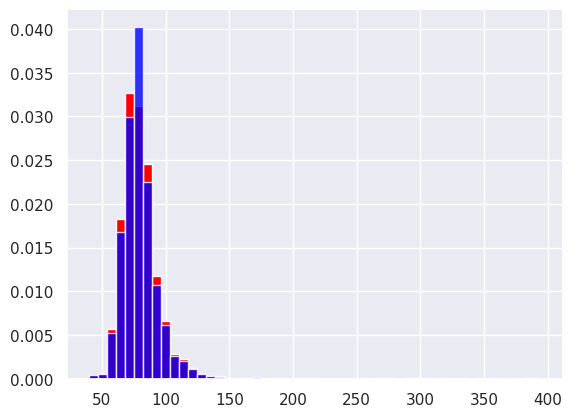

In [21]:
# PLotting the original data and the transformed data...with the red crowns representing the added data
fig = plt.figure()
ax = fig.add_subplot(111)

pd.read_csv(path)['glucose'].hist(bins=50, ax=ax, density=True, color='red')
df['glucose'].hist(
    bins=50, ax=ax, density=True, color='blue', alpha=0.8)

<Axes: ylabel='Density'>

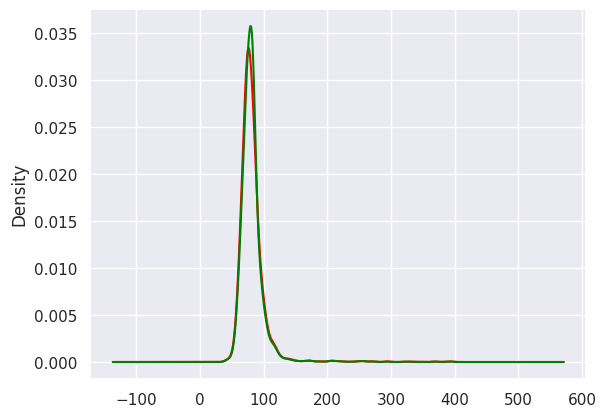

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

pd.read_csv(path)['glucose'].plot(kind='kde', ax=ax, color='red')
df['glucose'].plot(kind='kde', ax=ax, color='green')

In [23]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### **Data Analysis**


In [30]:
df.corr()["age"]

male              -0.024637
age                1.000000
currentSmoker     -0.213851
cigsPerDay        -0.189837
BPMeds             0.125256
prevalentStroke    0.044136
prevalentHyp       0.302707
diabetes           0.104704
totChol            0.263531
sysBP              0.388902
diaBP              0.202926
BMI                0.134271
heartRate         -0.010356
glucose            0.114947
TenYearCHD         0.226012
Name: age, dtype: float64

In [24]:
df.corr()["TenYearCHD"]

male               0.095364
age                0.226012
education         -0.051170
currentSmoker      0.023596
cigsPerDay         0.061480
BPMeds             0.085747
prevalentStroke    0.044228
prevalentHyp       0.173775
diabetes           0.089233
totChol            0.079842
sysBP              0.214799
diaBP              0.147853
BMI                0.079210
heartRate          0.026271
glucose            0.118769
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64

In [25]:
df[['TenYearCHD', 'age']].value_counts()

TenYearCHD  age
0           40     170
            42     166
            46     165
            39     159
            41     158
                  ... 
1           36       3
            35       2
0           32       1
            70       1
1           69       1
Name: count, Length: 74, dtype: int64

<Axes: >

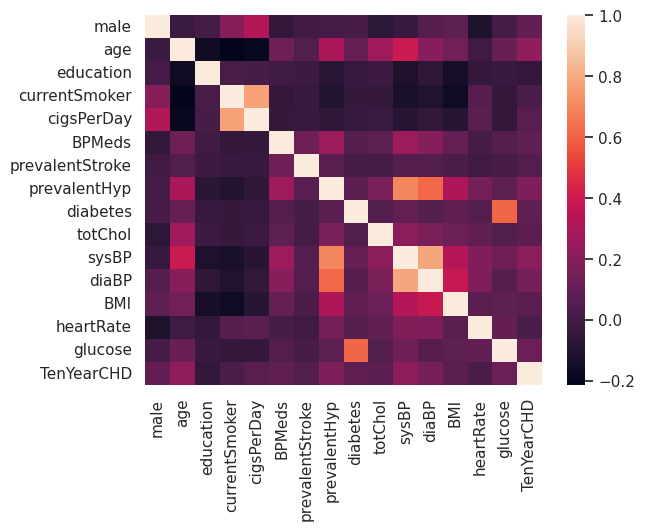

In [26]:
# We can check for the correlation between all columns using a heatmap
sns.heatmap(df.corr())

By the looks of both the correlation table and heatmap, the education column has no impact on the output column (TenYearCHD)<br>
We can simply drop it


In [27]:
df.drop(["education"], axis=1, inplace=True)

Let's now take a look at the count of unique values in the output column


In [28]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3506
1     613
Name: count, dtype: int64

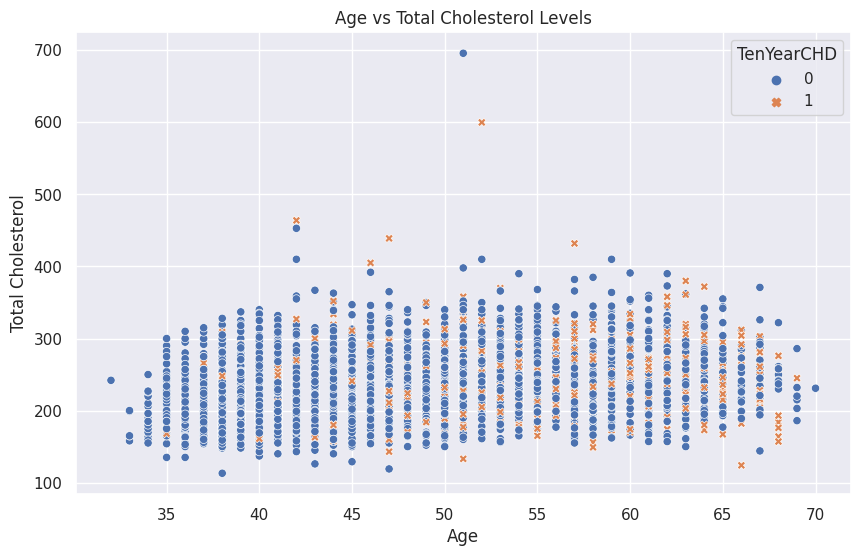

In [31]:
# Scatter plot of age versus total cholesterol levels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='totChol', hue='TenYearCHD',
                style='TenYearCHD', data=df)
plt.title('Age vs Total Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Total Cholesterol')
plt.show()

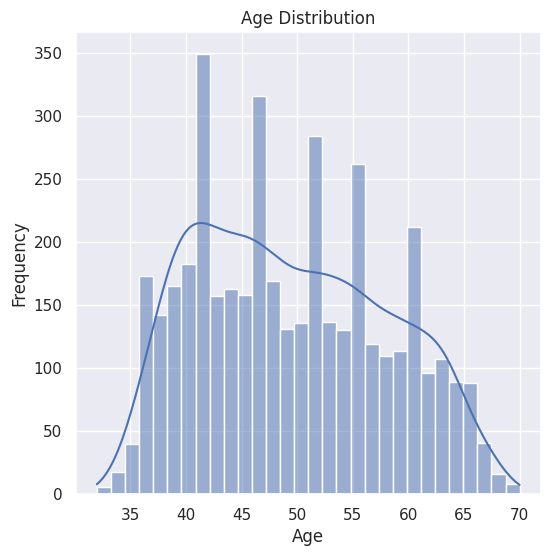

In [33]:
# Histogram of age distribution of patients
plt.figure(figsize=(6, 6))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
# This shows that the majority of population used to be in the age group of 35-50 years

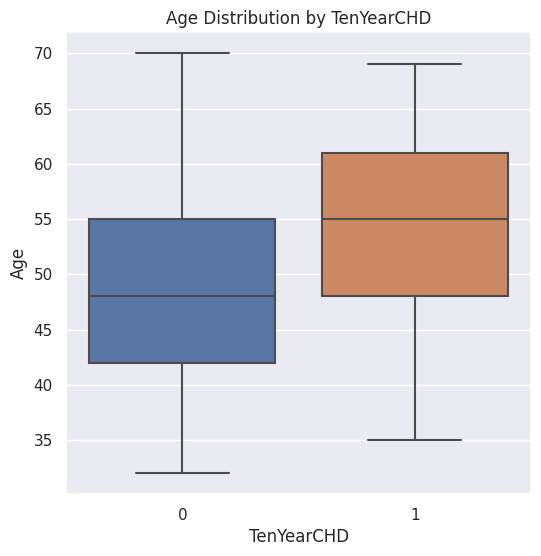

In [34]:
# Box plot of age variable grouped by TenYearCHD variable
plt.figure(figsize=(6, 6))
sns.boxplot(x='TenYearCHD', y='age', data=df)
plt.title('Age Distribution by TenYearCHD')
plt.xlabel('TenYearCHD')
plt.ylabel('Age')
plt.show()
# We can see that the Ten Year CHD chance of occurence to a person is higher when the person is older. ( > 55 years)
# This is an indication that age increases the chance of CHD occurrence to a person.

### **Conclusion**


    1. Feature Importance

Based on this dataset, the top 6 features contributing to the occurence of coronary heart disease are;\
 i. Age – Age of participants.\
 ii. SysBp – Systolic blood pressure levels of participants.\
 iii. TotChol – Total amount of cholesterol in the blood of participants.\
 iv. BMI – Body Mass Index of participants.\
 v. Glucose – Blood glucose levels of participants.\
 vi. DiaBP – Diastolic blood pressure of participants.\
Notably, it was age that played a crucial role in influencing the occurence of CHD. Blood Pressure (SysBp) was a close second.

    2. Results Interpretation

- Demographic Trends and Lifestyle Factors
  Age was the main demographic factor and had a major influence on the ccurence of CHD.\
  In general, the following trends were observed; \
   i. By looking at the total count of those at risk of acquiring CHD grouped by age, it is visible that a majority of those at risk are those whose age ranged from 50 – 70 years at the time the data was collected.\
   ii. When a demographic factor such as age was combined with lifestyle factors such as total cholesterol(totChol) and systolic blood pressure level (sysBP), the count of those at risk went high\
   iii. The lifestyle factors which emerged as significant contributors to CHD risk are sysBP, totChol, BMI, glucose and diaBP


### **References**


- https://www.msn.com/en-us/health/condition/Coronary-artery-disease/hp-Coronary-artery-disease?source=conditioncdx
- https://www.nhlbi.nih.gov/health/coronary-heart-disease/causes
- https://www.cdc.gov/heartdisease/coronary_ad.htm
- https://www.heart.org/en/health-topics/consumer-healthcare/what-is-cardiovascular-disease/coronary-artery-disease
- https://databox.com/data-insights-best-practices
- https://www.kaggle.com
